In [16]:
from src.dataset import Dataset
import src.aggregate as agg
import src.daysselector as ds
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = Dataset.from_csv("./csv/30_issda.csv")

days_selected = ds.build_days(df, "num-start-" + str(1000), 1000)
df = df.get_subset_days(days_selected)

df = df.get_random_subset(500, None)

df.df

d    4     8     9    19    23    25  33    65    67  ...  \
0    2009-07-15 00:00  692   614   209    66    78   211  49   491   157  ...   
1    2009-07-15 00:30  381   553   206    66    60   212  64   286    61  ...   
2    2009-07-15 01:00  380   588   138    66   143   208   6   218    75  ...   
3    2009-07-15 01:30  379   622   131    67    34   160  70   226    90  ...   
4    2009-07-15 02:00  346   517   131    67    83   100  18   165    57  ...   
..                ...  ...   ...   ...   ...   ...   ...  ..   ...   ...  ...   
995  2009-08-04 17:30  205   701   662  1577  1284   688  67  1105  2477  ...   
996  2009-08-04 18:00  233  1250   276  1578   162  2910   5   442  1559  ...   
997  2009-08-04 18:30  324  1648   121  1581   198  1963  72   442   335  ...   
998  2009-08-04 19:00  319  1215  1373  1626  1002  1222   0   368   377  ...   
999  2009-08-04 19:30  318  1254  1814  1643  1314  1704  73   314   172  ...   

     4527  4528  4529  4537  4556  4565  4577  4591  4600  4608  
0      22   228   625   233   217   267   672  1686   293   915  
1     118   110   521   198   132   246   679   592   192    61  
2     155    71   638   188    74   307   617  1486    99    62  
3     136    63   689   209    72   217   567  1238    96    45  
4      63    98   575   121   173   153   642   126    81    28  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
995   230  1419  2372   381   372  1544  2617  4706   145    45  
996   168   421  1547   249   560  1969  2118  5808   108    55  
997    81   179  1121  2590   575   385  1164  4410   362    55  
998   115   184  1070   457  1428   342   821  3556   291    25  
999   111   128  1345   265  1644   568   688  3293   142    57  

[1000 rows x 501 columns]

d     agg  ukn_n  ukn_min  ukn_max     clear     noise
0    2009-07-15 00:00  257459      1  -121890   121890  212895.4   44563.6
1    2009-07-15 00:30  259547      1  -121890   121890  181311.0   78236.0
2    2009-07-15 01:00  261654      1  -121890   121890  152994.0  108660.0
3    2009-07-15 01:30  263757      1  -121890   121890  142506.0  121251.0
4    2009-07-15 02:00  265839      1  -121890   121890  131624.0  134215.0
..                ...     ...    ...      ...      ...       ...       ...
995  2009-08-04 17:30  247963      1  -121890   121890  368219.0 -120256.0
996  2009-08-04 18:00  249673      1  -121890   121890  356401.0 -106728.0
997  2009-08-04 18:30  251496      1  -121890   121890  351368.0  -99872.0
998  2009-08-04 19:00  253414      1  -121890   121890  345690.0  -92276.0
999  2009-08-04 19:30  255408      1  -121890   121890  360743.0 -105335.0

[1000 rows x 7 columns]

12919.4

<AxesSubplot:>

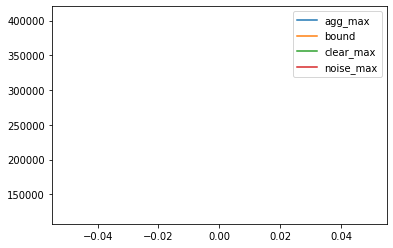

In [22]:
dfm = pd.DataFrame()

for i in range(1):
    df_agg = agg.build_aggregate(df, "fpa", {
            "outliers": 0.90,
            "epsilon": 10,
            "k": 20,
            "bound": 0.3,
        })

    dfm = dfm.append({
        #"i": i,
        "clear_max": df_agg.df["clear"].max(),
        "agg_max": df_agg.df['agg'].max(),
        #"dm": df.filter_outliers(0.9).get_max(),
        "bound": df_agg.df['ukn_max'].max(),
        "noise_max": df_agg.df["noise"].max(),
    }, ignore_index=True)

display(df_agg.df)
display(df.filter_outliers(0.9).get_max())
dfm.plot()

<AxesSubplot:>

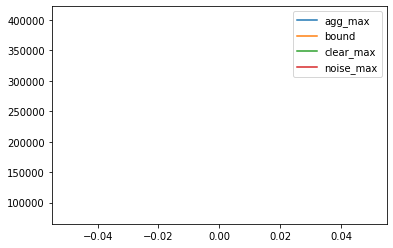

In [19]:
dfm = pd.DataFrame()

for i in range(1):
    df_agg = agg.build_aggregate(df, "fpa", {
            "outliers": 0.90,
            "epsilon": 1,
            "k": 20,
            "bound": 0.2,
        })

    dfm = dfm.append({
        #"i": i,
        "clear_max": df_agg.df["clear"].max(),
        "agg_max": df_agg.df['agg'].max(),
        #"dm": df.filter_outliers(0.9).get_max(),
        "bound": df_agg.df['ukn_max'].max(),
        "noise_max": df_agg.df["noise"].max(),
    }, ignore_index=True)

dfm.plot()

302813.0
406301.0


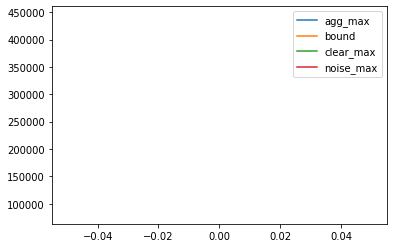

In [20]:
dfm = pd.DataFrame()

for i in range(1):
    df_agg = agg.build_aggregate(df, "fpa", {
        "outliers": 0.90,
        "epsilon": 0.1,
        "k": 20,
        "bound": 0.2
    })

    dfm = dfm.append({
        #"i": i,
        "clear_max": df_agg.df["clear"].max(),
        "agg_max": df_agg.df['agg'].max(),
        #"dm": df.filter_outliers(0.9).get_max(),
        "bound": df_agg.df['ukn_max'].max(),
        "noise_max": df_agg.df["noise"].max(),
    }, ignore_index=True)

dfm.plot()

print(dfm.noise_max.max())
print(dfm.clear_max.max())